## Content Promotion STAGING to PRODUCTION
1.  Connect to STAGING
2.  Access STAGING Group
3.  Create Export Package as new item
4.  Download .epk local to Notebook
5.  Connect to PRODUCTION
6.  Add .epk as new Export Package item
7.  Share with PRODUCTION Group
8.  Inspect (preview)
9.  Import content into PRODUCTION Group

#### 1. Connect to STAGING Enterprise Portal to Extract Group Data

In [12]:
import time
import warnings
warnings.simplefilter("ignore")
from arcgis.gis import GIS
staging = GIS("home")
staging

GIS @ https://entstaging.dev.geocloud.com/portal version:8.4

#### 2. Access Staging Group

<Group title:"Distribution Data - STAGING" owner:bmajor>
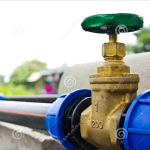

In [13]:
exportGroup = staging.groups.get("c0e70c9ab12248febe8a179b057ce684")
exportGroup

#### 3. Create Export Package of Group Items

In [14]:
epk_item = exportGroup.migration.create(future=False)
epk_item

<Item title:"Distribution_Data_-_STAGING_2021310_022800.epk" type:Export Package owner:bmajor>

#### 4. Download package file local to Notebook

In [15]:
fp = epk_item.download()
print(fp)

/tmp/DistributionDataSTAGING2021310022800.epk


#### 5. Connect to PRODUCTION Enterprise Portal to Import Package

In [16]:
import os.path
filename = "/arcgis/home/credentials.txt"
with open(filename) as f:
    content = f.read().splitlines()
    for line in content:
        if (line.startswith("username")):
            username = line.split(":")[1].strip()
        if (line.startswith("password")):
            password = line.split(":")[1].strip()

In [17]:
production = GIS(url="https://entproduction.dev.geocloud.com/portal", username=username, password=password, verify_cert=False)
production

GIS @ https://entproduction.dev.geocloud.com/portal version:8.4

#### 6. Add Export Package to Production Portal

In [18]:
pitem = production.content.add({'title': "STAGING to PRODUCTION Migration Package Update", "tags": ['Content Migration'],
                            'type': 'Export Package'}, data=fp)
pitem

<Item title:"STAGING to PRODUCTION Migration Package Update" type:Export Package owner:bmajor>

#### 7. Access PRODUCTION Group and Share Item

<Group title:"Distribution Data - PRODUCTION" owner:bmajor>
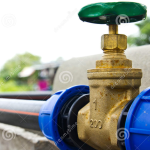

In [19]:
production_group = production.groups.get("ace18105d7934c34b395c94f82805e96")
production_group

In [20]:
# Share the item to production group
pitem.share(groups=[production_group])

{'results': [{'itemId': '7ea242d1f442406c9050a38407abe4e9',
   'success': True,
   'notSharedWith': ['']}]}

#### 8. Let's inspect the package

In [21]:
m = production_group.migration
resp = m.inspect(pitem)
from pprint import pprint
pprint(resp)

{'nextStart': -1,
 'num': 14,
 'packageSummary': {'fileName': 'Distribution_Data_-_STAGING_2021310_022800',
                    'id': '7ea242d1f442406c9050a38407abe4e9',
                    'packageCreated': 1615386480937,
                    'packageVersion': '1.0',
                    'sourcePortalInfo': {'httpUrl': 'http://entstaging.dev.geocloud.com/portal',
                                         'httpsUrl': 'https://entstaging.dev.geocloud.com/portal',
                                         'isPortal': True,
                                         'portalId': '49c806fc-841d-4d3a-8d1e-24500194b59c',
                                         'version': '10.9.0'}},
 'results': [{'canImport': True,
              'created': 1614892157138,
              'exists': True,
              'id': '10d9c8629c3a404aa66cfb4bcd2ee83f',
              'modified': 1615385926905,
              'size': 0,
              'title': 'Water Distribution Map',
              'type': 'Code Attachment'},
    

#### 9. Import  Package into Production Group

In [22]:
res = m.load(pitem)
print(res)
while res.running():
    print("Executing")
    time.sleep(30)
print("Group Content Import Completed!")

<Export Group Content Group Job: f7edd16cb58740ff84f4d58166292013>
Executing
Executing
Executing
Executing
Executing
Executing
Executing
Executing
Executing
Executing
Executing
Executing
Executing
Executing
Group Content Import Completed!
